# Homework 2: Sparse Model Selection

## Problem 1: Assessing penalized empirical risk

The following experiment considers brute force minimization of penalized empirical risk. We assume that $X$ is a random Gaussian matrix, set $\sigma^2=0.1$ for the noise variance, $p=10$, $n=100$, and $\beta^\ast=0$. This choice for $\beta^\ast$ means that any "detection" of a non-zero coefficient is a false positive. The code below illustrates a particular example where the AIC produces 4 false positives.

### Part A: Modify the code below to construct a histogram for the number of false positives produced by brute-force penalized empirical risk minimization. Make sure that the histogram is based on at least 25 examples.

### Part B: Modify the code below to assess the behavior of the histogram for the number of false positives produced by brute-force penalized empirical risk minimization when the penalty has the form $\sigma^2k\log(p)$.

### Part C: Modify the code below to assess the behavior of the histogram for the number of false positives produced by brute-force penalized empirical risk minimization when the penalty has the form $\sigma^2k\log(n)$.

In [19]:
import numpy as np
import numpy.random as rd
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from itertools import combinations, chain
allsubsets = lambda n: list(chain(*[combinations(range(n), ni) for ni in range(n+1)]))

def random_design(n,p):
    # Simple function for producing a random design matrix
    return rd.normal(scale=1/np.sqrt(p), size=(n,p))

# In this experiment, we simply assume that the true beta is the zero vector. Some notes:
# 1. Any detection of a nonzero beta is a false positive for this experiment
# 2. The predictive risk under the square loss for a model of size $k$ is just sigma^2 k.
# 3. The unbiased estimator for the risk is

rd.seed(14)

sigma2 = 0.1
n = 100
p = 10

v = allsubsets(p)

X = random_design(n, p)
e = rd.normal(scale=np.sqrt(sigma2), size=(n,))
y = e
y_norm2 = np.sum(e**2)

true_risks = []
penalized_empirical_risks = []

for s in v:
    if len(s)<1:
        # The empty set is a corner case -- no matrix slicing is possible
        true_risks.append(0.0)
        penalized_empirical_risks.append(y_norm2-n*sigma2)
    else:
        proj_y_norm2 = np.sum((X[:,s]@np.linalg.solve(X[:,s].T@X[:,s], X[:,s].T@y)))
        true_risks.append(sigma2*len(s))
        penalized_empirical_risks.append(y_norm2 - proj_y_norm2 + 2*sigma2*len(s)-n*sigma2)
        
# Construct tail log probabilities from gaussian and laplacian cdfs for the same range
fig = go.Figure(data=[go.Scatter(x=np.array(range(2**p)),
                                 y=penalized_empirical_risks,
                                 name='Penalized Empirical Risk',
                                 mode='markers'
                                 ),
                      go.Scatter(x=np.array(range(2**p)),
                                 y=true_risks,
                                 name='True Risk',
                                 mode='markers'
                                 )
                     ],
                layout=go.Layout(title=go.layout.Title(text="True vs. Empirical Risks"))
                )
fig.show()

ix_opt = np.argmin(penalized_empirical_risks)
print('This run produced %d false positives' % len(v[ix_opt]))


This run produced 4 false positives


### Part A

In [20]:
record=np.zeros(200)
for mm in range(200):
    X = random_design(n, p)
    e = rd.normal(scale=np.sqrt(sigma2), size=(n,))
    y = e
    y_norm2 = np.sum(e**2)

    true_risks = []
    penalized_empirical_risks = []

    for s in v:
        if len(s)<1:
            # The empty set is a corner case -- no matrix slicing is possible
            true_risks.append(0.0)
            penalized_empirical_risks.append(y_norm2-n*sigma2)
        else:
            proj_y_norm2 = np.sum((X[:,s]@np.linalg.solve(X[:,s].T@X[:,s], X[:,s].T@y)))
            true_risks.append(sigma2*len(s))
            penalized_empirical_risks.append(y_norm2 - proj_y_norm2 + 2*sigma2*len(s)-n*sigma2)

    ix_opt = np.argmin(penalized_empirical_risks)
    record[mm]=len(v[ix_opt])


In [21]:
import plotly.express as px

In [22]:
fig = px.histogram(record,width=800, height=400)
fig.show()

###  Part B

In [23]:
X = random_design(n, p)
e = rd.normal(scale=np.sqrt(sigma2), size=(n,))
y = e
y_norm2 = np.sum(e**2)

true_risks = []
penalized_empirical_risks = []
for s in v:
    if len(s)<1:
        # The empty set is a corner case -- no matrix slicing is possible
        true_risks.append(0.0)
        penalized_empirical_risks.append(y_norm2-n*sigma2)
    else:
        proj_y_norm2 = np.sum((X[:,s]@np.linalg.solve(X[:,s].T@X[:,s], X[:,s].T@y)))
        true_risks.append(sigma2*len(s))
        penalized_empirical_risks.append(y_norm2 - proj_y_norm2 + 2*len(s)*sigma2*np.log(p)-n*sigma2)
        
# Construct tail log probabilities from gaussian and laplacian cdfs for the same range
fig = go.Figure(data=[go.Scatter(x=np.array(range(2**p)),
                                 y=penalized_empirical_risks,
                                 name='Penalized Empirical Risk',
                                 mode='markers'
                                 ),
                      go.Scatter(x=np.array(range(2**p)),
                                 y=true_risks,
                                 name='True Risk',
                                 mode='markers'
                                 )
                     ],
                layout=go.Layout(title=go.layout.Title(text="True vs. Empirical Risks"))
                )
fig.show()

ix_opt = np.argmin(penalized_empirical_risks)
print('This run produced %d false positives' % len(v[ix_opt]))

This run produced 1 false positives


In [24]:
record=np.zeros(200)
for mm in range(200):
    X = random_design(n, p)
    e = rd.normal(scale=np.sqrt(sigma2), size=(n,))
    y = e
    y_norm2 = np.sum(e**2)

    true_risks = []
    penalized_empirical_risks = []

    for s in v:
        if len(s)<1:
            # The empty set is a corner case -- no matrix slicing is possible
            true_risks.append(0.0)
            penalized_empirical_risks.append(y_norm2-n*sigma2)
        else:
            proj_y_norm2 = np.sum((X[:,s]@np.linalg.solve(X[:,s].T@X[:,s], X[:,s].T@y)))
            true_risks.append(sigma2*len(s))
            penalized_empirical_risks.append(y_norm2 - proj_y_norm2 + 2*len(s)*sigma2*np.log(p)-n*sigma2)

    ix_opt = np.argmin(penalized_empirical_risks)
    record[mm]=len(v[ix_opt])

In [25]:
fig = px.histogram(record,width=800, height=400)
fig.show()

### Part C

In [26]:
X = random_design(n, p)
e = rd.normal(scale=np.sqrt(sigma2), size=(n,))
y = e
y_norm2 = np.sum(e**2)

true_risks = []
penalized_empirical_risks = []
for s in v:
    if len(s)<1:
        # The empty set is a corner case -- no matrix slicing is possible
        true_risks.append(0.0)
        penalized_empirical_risks.append(y_norm2-n*sigma2)
    else:
        proj_y_norm2 = np.sum((X[:,s]@np.linalg.solve(X[:,s].T@X[:,s], X[:,s].T@y)))
        true_risks.append(sigma2*len(s))
        penalized_empirical_risks.append(y_norm2 - proj_y_norm2 + 2*len(s)*sigma2*np.log(n)-n*sigma2)
        
# Construct tail log probabilities from gaussian and laplacian cdfs for the same range
fig = go.Figure(data=[go.Scatter(x=np.array(range(2**p)),
                                 y=penalized_empirical_risks,
                                 name='Penalized Empirical Risk',
                                 mode='markers'
                                 ),
                      go.Scatter(x=np.array(range(2**p)),
                                 y=true_risks,
                                 name='True Risk',
                                 mode='markers'
                                 )
                     ],
                layout=go.Layout(title=go.layout.Title(text="True vs. Empirical Risks"))
                )
fig.show()

ix_opt = np.argmin(penalized_empirical_risks)
print('This run produced %d false positives' % len(v[ix_opt]))

This run produced 0 false positives


In [27]:
record=np.zeros(200)
for mm in range(200):
    X = random_design(n, p)
    e = rd.normal(scale=np.sqrt(sigma2), size=(n,))
    y = e
    y_norm2 = np.sum(e**2)

    true_risks = []
    penalized_empirical_risks = []

    for s in v:
        if len(s)<1:
            # The empty set is a corner case -- no matrix slicing is possible
            true_risks.append(0.0)
            penalized_empirical_risks.append(y_norm2-n*sigma2)
        else:
            proj_y_norm2 = np.sum((X[:,s]@np.linalg.solve(X[:,s].T@X[:,s], X[:,s].T@y)))
            true_risks.append(sigma2*len(s))
            penalized_empirical_risks.append(y_norm2 - proj_y_norm2 + 2*len(s)*sigma2*np.log(n)-n*sigma2)

    ix_opt = np.argmin(penalized_empirical_risks)
    record[mm]=len(v[ix_opt])

In [28]:
fig = px.histogram(record,width=800, height=400)
fig.show()

### Comment
Actually from the plots we can see that the second and the third penalty terms lead to less false positives because the penalized empirical risk increases dramatically in comparison to the original one.

When n < p
$$
2\sigma^2 k < 2\sigma^2 k log(n) < 2\sigma^2 k log(p)
$$


## Problem 2: Forward-Backward Algorithm

Performing brute-force penalized empirical risk minimization is slow when $p$ is greater than $10$ ($1024$ subsets to check), and prohibitively slow when $p$ is greater than $20$ (Over a million subsets to check). 

The following code implements the forward selection algorithm, and provides an example for the $3$-sparse $\beta^\ast$ from Homework 1. 

### Part A: Modify the code below to implement the forward-backward selection algorithm, and determine if it produces a different answer for the example provided below.

### Part B: Use your code from Part A of this problem to compare the forward-backward algorithm with the brute-force penalized empirical risk minimization from Problem 1. That is, produce at least 25 random examples from the code in Problem 1, for each sample with index $i=1,\ldots, 25$ compute the number of false positives produced by brute-force penalized empirical risk minimization $fp_{bf, i}$ and the  number of false positives produced by the forward-backward algorithm $fp_{fb,i}$, and produce a scatter plot for the points $\{(fp_{bf,i},fp_{fb,i})\}_{i=1}^{25}$. In both cases, use the AIC. Based on this plot, how do you think these two algorithms compare?

### Part C: Modify the code from Problem 1 to produce random examples where $n=1000$ and $p=100$, but where $\beta^\ast$ is still $0$. Produce a histogram of false positives produced by the forward-backward over at least 25 independent trials. Do this for the AIC as well as the penalty $\sigma^2k\log(p)$, and compare the histograms of the number of false positives produced by both of these penalties over these 25 independent trials as well as a scatter plot of the pairs of false positive counts produced by each run: $\{(fp_{AIC,i},fp_{\sigma^2\log(p),i})\}_{i=1}^{25}$.

### Part D: Comparison of false postives for the AIC penalty and the $\sigma^2k\log(p)$ penalty is somewhat unfair in the case where there are no true positives. Modify your code to consider the true $\tilde\beta^\ast$ with entries given by
$$
\tilde\beta^\ast_i=\left\{\begin{array}{ll}
1&\text{for } i<10\\
0&\text{for } 10\leq i
\end{array}\right.
$$
### In other words, the first $10$ entries of $\tilde\beta^\ast$ are $1$ and the remaining entries are zero. Continue to use the same random generation of $X$, $n=1000$, and $p=100$. For each $k=1,\ldots, 10$, run 25 independent trails and check the number of true positives and false positives produced by the forward-backward algorithm using the AIC and $\sigma^2k\log(p)$ penalties. Provide visualizations that compare the number of true positives produced using both of these penalties. 

### Part E: Perform the same experiment/visual comparison from Part D for $\beta^\ast = 0.1\tilde\beta^\ast$ and $\beta^\ast=10\tilde\beta^\ast$. How would you expect the magnitude of the coefficients to impact the detection of true positives? Do your results vindicate your expectation?


In [35]:
import numpy as np
import numpy.random as rd
import numpy.linalg as la

import plotly.graph_objects as go
import matplotlib.pyplot as plt
def random_design(n,p):
    # Simple function for producing a random design matrix
    return rd.normal(scale=1/np.sqrt(p), size=(n,p))

def forward_select(y,X,pen):
    p = X.shape[1]
    m = []
    mc = list(range(p))
    k = 1
    
    XtX = X.T @ X
    Xty = X.T @ y
    
    res = np.sum(y**2) # Initialize residual error
    crit = res
    
    y_proj = np.copy(y)
    X_proj = np.copy(X)
    
    # Perform the first selection
    
    crits = res - ((Xty)**2/np.diag(XtX)) + pen(1)
    best_crit = np.min(crits)
    if best_crit < crit:
        crit = best_crit
        j = np.argmin(crits)
        m.append(j)
        del mc[j]
    else:
        return [], np.zeros(p), res
    
    # Continue with forward selection
    
    while True:
        print(crit)
        print(m)
        k = k+1
        u, s, vt = la.svd(X[:, m], full_matrices=False)
        y_proj = y - (u@(u.T @ y))
        res = la.norm(y_proj)**2
        print(res)
        X_proj = X - (u @ (u.T @ X))
        col_norm2 = np.sum(X_proj[:, mc]**2, axis=0)
        residuals = res - (y.T@X_proj[:, mc])**2/col_norm2
        crits = residuals + pen(k)
        # plt.scatter(range(p), y.T@X)
        # plt.show()
        best_crit = np.min(crits)
        if best_crit < crit:
            crit = best_crit
            j = np.argmin(crits)
            m.append(j)
            del mc[j]
        else:
            break
            
    beta_hat_nonzero = np.linalg.solve(XtX[np.ix_(m, m)], Xty[m])
    beta_hat = np.zeros((p,1))
    beta_hat[m, 0] = beta_hat_nonzero
     
    return m, beta_hat, crit


rd.seed(14)

p = 1000
#rho = [0.01, 0.1, 1, 10, 100]
n=10000

sigma2 = 0.01 # Noise variance

# Construct the true beta
beta = np.zeros((p,))
beta[4] = 2
beta[16] = 4
beta[64] = 8
beta[256] = 16
beta[512] = 32

X = random_design(n, p)

y = X @ beta + rd.normal(scale=np.sqrt(sigma2), size=(n,))

aic = lambda k: 2*sigma2*k
hd_bic = lambda k: 2*sigma2*np.log(p)*k

m, beta_hat, emp_risk_min_appx = forward_select(y, X, aic)

print(m)

idx = list(range(p))

fig = go.Figure(data=go.Scatter(x=idx, y=np.ravel(beta_hat), mode='markers'))
fig.show()

3486.5326864849226
[512]
3486.5126864849162
936.5649247656388
[512, 256]
936.524924765648
301.51278989532767
[512, 256, 64]
301.45278989532505
144.41581306415208
[512, 256, 64, 16]
144.33581306415158
103.74783479659087
[512, 256, 64, 16, 4]
103.64783479659094
103.65263891273996
[512, 256, 64, 16, 4, 179]
103.64627637223596
-3125.4898158194874
[512, 256, 64, 16, 4, 179, 176]
103.64606940397465
[512, 256, 64, 16, 4, 179, 176]


### Part A

In [32]:
import numpy as np
import numpy.random as rd
import numpy.linalg as la
def forward_backward_select(y,X,pen):
    p = X.shape[1]
    m = []
    mc = list(range(p))
    k = 1
    
    XtX = X.T @ X
    Xty = X.T @ y
    
    res = np.sum(y**2) # Initialize residual error
    crit = res
    
    y_proj = np.copy(y)
    X_proj = np.copy(X)
    
    # print('### '+'Stage'+'1')
    # Perform the first selection
    
    crits = res - ((Xty)**2/np.diag(XtX)) + pen(1)
    best_crit = np.min(crits)
    if best_crit < crit:
        crit = best_crit
        j = np.argmin(crits)
        m.append(mc[j])
        del mc[j]
        # print(m)
    else:
        return [], np.zeros(p), res
    
    # Continue with forward selection
    stage=1
    while True:
        stage = stage + 1
        # print('### '+'Stage'+'''{}'''.format(stage))
        ###Forward
        # print('Forward')
        k = k+1
        if(k>p):
            break
            
        u, s, vt = la.svd(X[:, m], full_matrices=False)
        y_proj = y - (u@(u.T @ y))
        res = la.norm(y_proj)**2
        X_proj = X - (u @ (u.T @ X))
        col_norm2 = np.sum(X_proj[:, mc]**2, axis=0)
        residuals = res - (y.T@X_proj[:, mc])**2/col_norm2
        crits = residuals + pen(k)
        best_crit = np.min(crits)

        
        if best_crit < crit:
            crit = best_crit
            j = np.argmin(crits)
            m.append(mc[j])
            del mc[j]
            stop1=True
            # print(m)
        else:
            k=k-1
            stop1=False
            
        ###Backward
        # print('Backward')
        k = k-1
        if(len(m)==0):
            break
        
        records = np.zeros(len(m))
        for i in range(len(m)):
            sm=np.copy(m).tolist()
            del sm[i]
            u, s, vt = la.svd(X[:, sm], full_matrices=False)
            y_proj = y - (u@(u.T @ y))
            records[i] = la.norm(y_proj)**2 
        crits = records + pen(k)
        best_crit = np.min(crits)
        
        if best_crit < crit:
            crit = best_crit
            j = np.argmin(crits)
            mc.append(m[j])
            del m[j]
            stop2=True
            # print(m)
        else:
            k=k+1
            stop2=False
        
        if(not(stop1 or stop2)):
            break

    beta_hat_nonzero = np.linalg.solve(XtX[np.ix_(m, m)], Xty[m])
    beta_hat = np.zeros((p,1))
    beta_hat[m, 0] = beta_hat_nonzero
     
    return m, beta_hat, crit


rd.seed(14)

p = 1000
#rho = [0.01, 0.1, 1, 10, 100]
n=10000

sigma2 = 0.01 # Noise variance

# Construct the true beta
beta = np.zeros((p,))
beta[4] = 2
beta[16] = 4
beta[64] = 8
beta[256] = 16
beta[512] = 32

X = random_design(n, p)

y = X @ beta + rd.normal(scale=np.sqrt(sigma2), size=(n,))

aic = lambda k: 2*sigma2*k
hd_bic = lambda k: 2*sigma2*np.log(p)*k

m, beta_hat, emp_risk_min_appx = forward_backward_select(y, X, hd_bic)

print(m)

idx = list(range(p))

fig = go.Figure(data=go.Scatter(x=idx, y=np.ravel(beta_hat), mode='markers'))
fig.show()

[512, 256, 64, 16, 4]


### Comment
Compared with the variables selected from forward algorithm, the backward selection seems to filter some insignificant variables. Actually, the significant variables(512,256,64,16,4) are all selected from both algorithms. The only different variables are noisy variables [179, 176]

### Part B

In [49]:
record=np.zeros(25)
record2=np.zeros(25)
m_record=[]
sigma2 = 0.1
n = 100
p = 10
v = allsubsets(p)

aic = lambda k: 2*sigma2*k
hd_bic = lambda k: 2*sigma2*np.log(p)*k

for i in range(25):
    #F-B
    X = random_design(n, p)
    e = rd.normal(scale=np.sqrt(sigma2), size=(n,))
    y = e
    y_norm2 = np.sum(e**2)

    true_risks = []
    penalized_empirical_risks = []

    m, beta_hat, emp_risk_min_appx = forward_backward_select(y, X, aic)

    record2[i]=len(m)
    m_record.append(m)
    
    #Brutal Force
    true_risks = []
    penalized_empirical_risks = []

    for s in v:
        if len(s)<1:
            # The empty set is a corner case -- no matrix slicing is possible
            true_risks.append(0.0)
            penalized_empirical_risks.append(y_norm2-n*sigma2)
        else:
            proj_y_norm2 = np.sum((X[:,s]@np.linalg.solve(X[:,s].T@X[:,s], X[:,s].T@y)))
            true_risks.append(sigma2*len(s))
            penalized_empirical_risks.append(y_norm2 - proj_y_norm2 + 2*sigma2*len(s)-n*sigma2)

    ix_opt = np.argmin(penalized_empirical_risks)
    record[i]=len(v[ix_opt])

In [50]:
fig = px.scatter(x=record, y=record2, labels=dict(x="FP_Brutal Force", y="FP_FB"))
fig.show()

Actually there are differences between the results from two methods. But the difference is not big. Considering the executing time, it's better to use forward-backward method.

### Part C

In [55]:
record3=np.zeros(25)
record4=np.zeros(25)
m_record=[]
sigma2 = 0.1
n = 1000
p = 100

aic = lambda k: 2*sigma2*k
hd_bic = lambda k: 2*sigma2*np.log(p)*k

for i in range(25):
    #AIC
    X = random_design(n, p)
    e = rd.normal(scale=np.sqrt(sigma2), size=(n,))
    y = e
    y_norm2 = np.sum(e**2)

    true_risks = []
    penalized_empirical_risks = []

    m, beta_hat, emp_risk_min_appx = forward_backward_select(y, X, aic)
    record3[i]=len(m)
    
    #BIC
    true_risks = []
    penalized_empirical_risks = []

    m, beta_hat, emp_risk_min_appx = forward_backward_select(y, X, hd_bic)
    record4[i]=len(m)


In [56]:
fig = px.scatter(x=record3, y=record4, labels=dict(x="FP_AIC", y="FP_BIC"))
fig.show()

BIC gives the higher penalty on the regularization where the average FP with BIC is much smaller than that of AIC.

### Part D

In [59]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

record5=np.zeros(25)
record6=np.zeros(25)
record5_t=np.zeros(25)
record5_f=np.zeros(25)
record6_t=np.zeros(25)
record6_f=np.zeros(25)

true_set=np.arange(10).tolist()

m_record=[]
sigma2 = 0.1
n = 1000
p = 100
beta=np.zeros(100)
for i in range(10):
    beta[i]=1

for i in range(25):
    #AIC
    X = random_design(n, p)
    e = rd.normal(scale=np.sqrt(sigma2), size=(n,))
    y = e+X@beta
    y_norm2 = np.sum(y**2)

    true_risks = []
    penalized_empirical_risks = []

    m, beta_hat, emp_risk_min_appx = forward_backward_select(y, X, aic)
    record5_t[i]=len(intersection(true_set,m))
    record5_f[i]=len(m)-record5_t[i]
    record5[i]=len(m)
    #BIC
    true_risks = []
    penalized_empirical_risks = []

    m, beta_hat, emp_risk_min_appx = forward_backward_select(y, X, hd_bic)
    record6_t[i]=len(intersection(true_set,m))
    record6_f[i]=len(m)-record5_t[i]
    record6[i]=len(m)

In [61]:
fig = px.scatter(x=record5_t, y=record6_t, labels=dict(x="TP_AIC", y="TP_BIC"))
fig.show()

When there are some true positives, the sensitivity of both criteria are same where they give the same count on true positives.

### Part E

$\beta=0.1$

In [68]:
record5_t=np.zeros(25)
record5_f=np.zeros(25)
record6_t=np.zeros(25)
record6_f=np.zeros(25)
record5=np.zeros(25)
record6=np.zeros(25)

true_set=np.arange(10).tolist()

m_record=[]
sigma2 = 0.1
n = 1000
p = 100
beta=np.zeros(100)
for i in range(10):
    beta[i]=0.1

for i in range(25):
    #AIC
    X = random_design(n, p)
    e = rd.normal(scale=np.sqrt(sigma2), size=(n,))
    y = e+X@beta
    y_norm2 = np.sum(y**2)

    true_risks = []
    penalized_empirical_risks = []

    m, beta_hat, emp_risk_min_appx = forward_backward_select(y, X, aic)
    record5_t[i]=len(intersection(true_set,m))
    record5_f[i]=len(m)-record5_t[i]
    record5[i]=len(m)
    #BIC
    true_risks = []
    penalized_empirical_risks = []

    m, beta_hat, emp_risk_min_appx = forward_backward_select(y, X, hd_bic)
    record6_t[i]=len(intersection(true_set,m))
    record6_f[i]=len(m)-record5_t[i]
    record6[i]=len(m)
    
fig = px.scatter(x=record5_t, y=record6_t, labels=dict(x="TP_AIC", y="TP_BIC"))
fig.show()

$\beta=10$

In [69]:
record5_t=np.zeros(25)
record5_f=np.zeros(25)
record6_t=np.zeros(25)
record6_f=np.zeros(25)

true_set=np.arange(10).tolist()

m_record=[]
sigma2 = 0.1
n = 1000
p = 100
beta=np.zeros(100)
for i in range(10):
    beta[i]=10

for i in range(25):
    #AIC
    X = random_design(n, p)
    e = rd.normal(scale=np.sqrt(sigma2), size=(n,))
    y = e+X@beta
    y_norm2 = np.sum(y**2)

    true_risks = []
    penalized_empirical_risks = []

    m, beta_hat, emp_risk_min_appx = forward_backward_select(y, X, aic)
    record5_t[i]=len(intersection(true_set,m))
    record5_f[i]=len(m)-record5_t[i]
    
    #BIC
    true_risks = []
    penalized_empirical_risks = []

    m, beta_hat, emp_risk_min_appx = forward_backward_select(y, X, hd_bic)
    record6_t[i]=len(intersection(true_set,m))
    record6_f[i]=len(m)-record5_t[i]

In [70]:
fig = px.scatter(x=record5_t, y=record6_t, labels=dict(x="TP_AIC", y="TP_BIC"))
fig.show()

### Comment

When all $\beta$ values are small, it will impair the effect of BIC. The penalty of BIC take much higher proportion when compared with that of AIC. Therefore there will be less true positives detected by BIC. 

With $\beta$ values increasing, Both two criteria are becoming same when detecting the positives. This is because that the higher $\beta$ value goes over the effect of different penalty methods.

Additionally, With $\beta$ decreasing, the MSE term becomes even smaller in comparison to the penalized term, which makes the BIC metric harder to detect true positives than AIC.

## Problem 3: PCA Dictionary for Model Selection

Consider the sum of squares error

$$
\Vert y - X\beta\Vert^2
$$

Using the "skinny" SVD $X=U\Sigma V^T$, this becomes

$$
\Vert y-U\Sigma V^T\beta\Vert^2 = \Vert y - U\Sigma \alpha\Vert^2
$$

where $\alpha = V^T\beta$. Instead of using a model selection algorithm to construct $\beta$, we can use one to construct $\alpha$. This has some good properties:

1. Model selection methods generally perform poorly (and the results are more difficult to interpret) when covariates are highly correlated. Since $U\Sigma$ has orthogonal columns, this procedure avoids these issues.

2. While dimension reduction using PCA can be problematic for regression, this procedure directly chooses PCA components relevant to the regression problem. 

Given a new data point $x$, $xV\alpha=xVV^T\beta=xP\beta$ where $P$ is projection onto the span of the original data set. This provides a

### Part A: For real data, $\sigma^2$ must be estimated to carry out model selection using the penalties we have discussed. Perform ordinary least squares for the Riboflavin data to estimate $\sigma^2$ from the residuals $\epsilon_i = y_i - \beta_0 - \beta_1 x_1^{(i)} - \cdots - \beta_d x_d^{(i)}$ using the formula $\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n\Vert \epsilon_i\Vert^2$. 

### Part B: What else does our derivation assume about the residuals $\epsilon_i$? Does this assumption appear to hold for the residuals of Riboflavin dataset from Part A?

### Part C: Code up model selection of PCA components described at the beginning of this problem. Use it to fit an $\alpha$ for the Ribosome data using your forward-backward selection code from Problem 2. Also fit a $\beta$ using the Ribosome data using forward-backward selection. Use your estimate of $\hat{\sigma}^2$ from Part A to carry out these procedures. Plot the coefficients of $\beta$ against the coefficients of $V\alpha$ in a scatterplot and interpret your results. 

### Part A

In [71]:
df_rx=pd.read_csv('riboflavin/riboflavinx.csv')
df_ry=pd.read_csv('riboflavin/riboflaviny.csv')

rx=np.array(df_rx.iloc[:,1:4089])
ry=np.array(df_ry.iloc[:,1])

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
reg = LinearRegression().fit(rx, ry) 

In [75]:
beta=reg.coef_
epsilon=rx@beta-ry+reg.intercept_
sigma2=np.mean(epsilon**2)
sigma2

5.510915619572139e-29

The $\sigma^2$ is as above number

### Part B

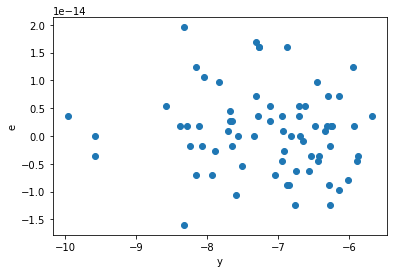

In [85]:
fig = plt.figure()
plt.scatter(ry,epsilon)
plt.xlabel('y')
plt.ylabel('e')
plt.show()

In [87]:
fig = px.scatter(epsilon)
fig.show()

In [105]:
df = np.append(rx, epsilon.reshape(-1,1), axis=1)

# residual and variables
np.corrcoef(df)[:,-1]

array([0.78594596, 0.80998633, 0.79904563, 0.84924843, 0.90599651,
       0.91669837, 0.81189614, 0.79730465, 0.8803617 , 0.90430602,
       0.92633229, 0.93626883, 0.88624158, 0.83904166, 0.90293594,
       0.76553386, 0.78158303, 0.85946944, 0.89889708, 0.85726666,
       0.88925691, 0.86421151, 0.85434299, 0.87242037, 0.8224824 ,
       0.83225096, 0.791028  , 0.8789056 , 0.8344816 , 0.83303741,
       0.86812038, 0.81594655, 0.83349607, 0.83429986, 0.86134945,
       0.84972331, 0.86778804, 0.86036442, 0.84735631, 0.87883337,
       0.86780806, 0.8374732 , 0.86624364, 0.920235  , 0.86665245,
       0.85381751, 0.90956372, 0.89308008, 0.94078971, 0.90142258,
       0.82118621, 0.89904312, 0.93544289, 0.88636482, 0.87119122,
       0.84326268, 0.90239234, 0.84880183, 0.89868603, 0.84286068,
       0.85590423, 0.85208546, 0.94349837, 0.88782159, 0.95675609,
       0.9304341 , 0.9491874 , 0.83767385, 0.95407346, 0.81309483,
       1.        ])

Assumptions: 
    
* We suppose it to be a zero-vector. 

However, it's close to a zero-vector but not a zero-vector actually. That's caused by the computation error of numerical methods.

* Independence of between errors and response

There is no relationship between y and residual from the scatter plot with y.

* Homoscedasticity

The error term should keep same across all values of the independent variables where this holds from the above scatter plot.

* No auto-correlation on error

The error term is independent from each other from the above plot we can see


* Additive error model

In OLS, we assumed the additive error model where this hold because of the homoscedasticity assumption.
* Independent from the variables

This may not hold. From the HW 1, we know that when n << p, the OLS is just overfitting the data. This can be observed that most of coefficients are so high between variables and the residual.

### Part C

In [107]:
from scipy.linalg import svd
U, S, Vt =svd(rx)

SS=np.diag(S)
VV=Vt[0:71,:]
USig=U@SS

### Construct $\beta$

In [111]:
sigma2


5.510915619572139e-29

In [ ]:
n = rx.shape[0]
p = rx.shape[1]
m, beta_hat, emp_risk_min_appx = forward_backward_select(ry, rx, hd_bic)

### Construct $\alpha$

In [110]:
n = rx.shape[0]
p = rx.shape[0]
m, alpha_hat, emp_risk_min_appx = forward_backward_select(ry, USig, hd_bic)

bb=VV.T@alpha_hat

In [115]:
fig = px.scatter(x = beta_hat.flatten(),y = bb.flatten(),labels=dict(x="beta", y="V*Alph"))
fig.show()

### Comment

In [119]:
beta1=beta_hat.flatten()
beta2=bb.flatten()
print(np.mean((np.dot(rx,beta1)-ry)**2))
print(np.mean((rx@beta2-ry)**2))

9.56661597146477e-21
1.0679398941976509e-27



As we can see, while the betas computed by alpha are overall non-zero and are all in a small range close to zero, beta_hat has most of its entries being zero and the rest being non-zero and relatively having relatively bigger values.

## Problem 4: Wavelet Model Selection

Consider this S&P 500 Index bid/ask dataset retreived from http://www.kibot.com/free_historical_data.aspx

The text has the format Date,Time,Price,Bid,Ask,Size. Each row represents a single trade that occurred. The Price field indicates the price of the trade, and the Size field indicates the number of stocks sold in the trade. The Bid/Ask fields indicate "national best bid and offer" at the time of the trade. That is, the Bid is the highest price someone is willing to pay for the stock at the time of the trade, and the Ask is the lowest price someone is willing to take for the stock at the time of the trade.

The following code performs a wavelet model selection for the first day or so from the data. It also displays the "inner products" of the columns of the "design" matrix.

Given what you know from Worked Problems 03 and the structure of the inner products of the design matrix, explain why just forward selection should generally give the same answer as a forward-backward method. In particular, what simpler method for variable selection (simpler than just forward selection) is suggested by the structure of inner products of the design matrix?

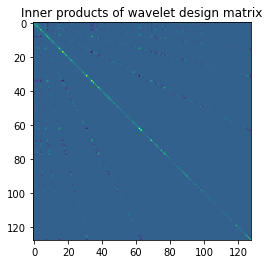

In [125]:
import pandas as pd
import pywt

import matplotlib.pyplot as plt

import scipy.interpolate as interp

import copy

def wavelet_forward_select(t, y, wavelet, r, pen):
    m = []
    mc = list(range(r))
    k = 0
    samples = len(t)
    t_uniform = np.linspace(np.min(t), np.max(t), r)
    
    coeffs = pywt.wavedec(np.zeros(r), wavelet)
    dummy, coeff_slices, coeff_shapes = pywt.ravel_coeffs(coeffs, axes=None)
 
    # To get the analogue of the design matrix, we need to evaluate wavelets at t
    X = np.zeros((samples,r))  
    for i in range(r):
        z = copy.copy(dummy)
        z[i] = 1.0

        w = pywt.waverec(pywt.unravel_coeffs(z, coeff_slices, coeff_shapes, output_format='wavedec'), wavelet)
        
        w_interp = interp.interp1d(t_uniform, w)
        
        #print(t)
        #print(w_interp(t))
        
        X[:, i] = w_interp(t)
        
    img = X.T @ X
    plt.imshow(img)
    plt.title('Inner products of wavelet design matrix')
    plt.show()
        
    res = np.sum(y**2) # Initialize residual error
    crit = res
    
    y_proj = y
    
    while True:
        k = k+1
        col_norm2 = np.sum(X[:,mc]**2, axis=0)
        residuals = res - (y_proj.T@X[:,mc])**2/col_norm2
        crits = residuals + pen(k)
        best_crit = np.min(crits)
        if best_crit < crit:
            # Update 
            crit = best_crit
            j = np.argmin(crits)
            m.append(mc[j])
            X_j2 = np.sum(X[:,mc[j]]**2)
            y_proj = y_proj - (y_proj.T @ X[:,mc[j]])*X[:,mc[j]]/X_j2.T
            res = np.sum(y_proj**2)
            del mc[j]
            
        else:
            break
            
    XtX = X.T @ X
    Xty = X.T @ y
    
    beta_hat_nonzero = np.linalg.solve(XtX[np.ix_(m, m)], Xty[m])
    beta_hat = np.zeros((r, 1))
    beta_hat[m,0] = beta_hat_nonzero
    
    wv_approx = pywt.waverec(pywt.unravel_coeffs(beta_hat, coeff_slices, coeff_shapes, output_format='wavedec'), wavelet)
     
    return m, beta_hat, wv_approx, t_uniform, crit

# Adjust nrows to adjust times
cols = ['Date', 'Time', 'Bid', 'Price', 'Ask', 'Size']
df = pd.read_csv("./finance/IVE_tickbidask.txt", nrows=2048, names=cols)

# Obtain numerical time stamps
df['t'] = df.apply(lambda row : pd.to_datetime(row['Date'] + ' ' + row['Time']).value/(10**9), axis = 1) 



# Perform wavelet approximation
r = 128
sigma2 = 0.25
hd_bic = lambda k: 2*sigma2*np.log(r)*k

m, beta_hat, wv_approx, t_uniform, crit = wavelet_forward_select(df.loc[:,'t'].values, df['Price'], 'db1', r, hd_bic)

fig = go.Figure(data=[go.Scatter(mode='markers',
                                 x=df['t'],
                                 y=df['Price'], 
                                 name='IVE Prices', 
                                 line=dict(width=3,))])


fig.add_trace(go.Scatter(x=t_uniform, y=wv_approx, name='Wavelet Approximation', line=dict(width=3,)))

fig.update_layout(
    title="Wavelet Approximation to IVE Trade Prices",
    xaxis_title="time stamp",
    yaxis_title="price",
    font=dict(
        family="Times",
        size=14,
        color="Black"
    )
)

fig.show()
  

### Comment:
Actually the grad matrix only has diagonal elements as major elements while other elements are minor. That indicates the column vectors of $X$ are nearly orthogonal. Thus at each stage we just need to consider about the norm square of $y$ onto one vector(in m or mc) and the decrease or increase of the penalized term. 

If we mark these norm squares computed at forward steps from each stage as $\sigma_1,\sigma_2,\cdots,\sigma_k$, we see that $\sigma_1>\sigma_2>\cdots>\sigma_k$ , since we choose the minimum at each stage.  

If we enter the judgement of a backward step, we only need to compare the minimum of norm squares of the projection of $y$ onto each vector, with the decrease of the penalized term. Actually the absolute values of decrease or increase of the penalized term are equivalent as $pen(1)$ at each step. And in the last forward step, we already asserted that $\sigma_k>pen(1)$. Thus $\sigma_i>pen(1)$ and we cannot enter the backward step.

Almost all the column vectors are nearly zero except the indices set of $\{0\}\cup\{2^n:n\in N\}$. We can search through indice set of $\{0\}\cup\{2^n:n\in N\}$ in an increasing order.

## Problem 5: Choose your own adventure

Using your own dataset, perform penalized regression or penalized logistic regression and discuss your results. 

In [127]:
df1=pd.read_csv('data.csv')
df2=pd.read_csv('labels.csv')
df1=df1.iloc[:,1:20532]
df2=df2.iloc[:,1]

'data.csv' collects the gene expressions. 'labels.csv' represents the kinds of cancer.  
To carry out a logistic regression, we only consider whether the label is 'LUAD' or not, making it a binary-classification problem.

In [128]:
labels=np.zeros(801)
labels[df2=='LUAD']=1

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, labels, test_size=0.2, random_state=42)

In [130]:
from sklearn.svm import l1_min_c
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)

clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)

coefs_ = []
error=[]
for c in cs:
    clf.set_params(C=c)
    clf.fit(X_train, y_train)
    coefs_.append(clf.coef_.ravel().copy())
    error.append(np.mean(clf.predict(X_test)-y_test)**2)

In [131]:
error

[0.032444735928397826,
 0.032444735928397826,
 0.00015431503414220128,
 3.857875853555032e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [132]:
norms=[]
for array in coefs_:
    norms.append(np.sum(array!=0))

In [133]:
from sklearn.linear_model import LogisticRegression

temp_model = LogisticRegression(fit_intercept=False,solver='liblinear').fit(X_train, y_train) 
np.mean((temp_model.predict(X_test)-y_test)**2)

0.0

In [134]:
np.sum(temp_model.coef_.ravel()!=0)

20258

### Comment
As we can see, the penalized term not only maintained the accuracy but also reduced the size of the support.